对21个节点使用三次样条内插f(x),然后对41个点给出两者的差，并画图显示

构建21个节点

In [1]:
import numpy as np
xlist=np.arange(-1,1.1,0.1)
print(xlist)

[-1.00000000e+00 -9.00000000e-01 -8.00000000e-01 -7.00000000e-01
 -6.00000000e-01 -5.00000000e-01 -4.00000000e-01 -3.00000000e-01
 -2.00000000e-01 -1.00000000e-01 -2.22044605e-16  1.00000000e-01
  2.00000000e-01  3.00000000e-01  4.00000000e-01  5.00000000e-01
  6.00000000e-01  7.00000000e-01  8.00000000e-01  9.00000000e-01
  1.00000000e+00]


函数f(x)和21个节点的y值

In [2]:
def f(x):
    return 1/(1+25*x*x)
ylist = f(xlist)
print(ylist)

[0.03846154 0.04705882 0.05882353 0.0754717  0.1        0.13793103
 0.2        0.30769231 0.5        0.8        1.         0.8
 0.5        0.30769231 0.2        0.13793103 0.1        0.0754717
 0.05882353 0.04705882 0.03846154]


计算μ，λ和d

In [3]:
miu = lambdaa = 0.5
n=21
d = 600*(ylist[:n-2]/2 + ylist[2:]/2 - ylist[1:n-1])
d = np.concatenate(([0], d, [0]))
print(d)

[   0.            0.95022624    1.46503885    2.36403996    4.02081978
    7.24137931   13.68700265   25.38461538   32.30769231  -30.
 -120.          -30.           32.30769231   25.38461538   13.68700265
    7.24137931    4.02081978    2.36403996    1.46503885    0.95022624
    0.        ]


创建三对角矩阵，其中a是主对角，b是下对角，c是上对角

In [4]:
a = np.concatenate(([1], np.full(19,2), [1]))
b = np.concatenate((np.full(19,0.5),[0]))
c = np.concatenate(([0], np.full(19,0.5)))
print(a,b,c)
mtx = np.diag(a) + np.diag(b,k=-1) + np.diag(c,k=1)
print(mtx)

[1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1] [0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5
 0.5 0. ] [0.  0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5
 0.5 0.5]
[[1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0. ]
 [0.5 2.  0.5 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0. ]
 [0.  0.5 2.  0.5 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0. ]
 [0.  0.  0.5 2.  0.5 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0. ]
 [0.  0.  0.  0.5 2.  0.5 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0. ]
 [0.  0.  0.  0.  0.5 2.  0.5 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0. ]
 [0.  0.  0.  0.  0.  0.5 2.  0.5 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0. ]
 [0.  0.  0.  0.  0.  0.  0.5 2.  0.5 0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0. ]
 [0.  0.  0.  0.  0.  0.  0.  0.5 2.  0.5 0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0. 

对三对角矩阵用thomas算法进行分解，创建alpha，beta并计算

In [5]:
alpha = np.ones(21)
beta = np.ones(20)

for i in range(20):
    beta[i] = b[i] / alpha[i]
    alpha[i+1] = a[i+1] - beta[i]*c[i]
print(alpha)
print(beta)

[1.         2.         1.875      1.86666667 1.86607143 1.86602871
 1.86602564 1.86602542 1.86602541 1.8660254  1.8660254  1.8660254
 1.8660254  1.8660254  1.8660254  1.8660254  1.8660254  1.8660254
 1.8660254  1.8660254  1.        ]
[0.5        0.25       0.26666667 0.26785714 0.26794258 0.26794872
 0.26794916 0.26794919 0.26794919 0.26794919 0.26794919 0.26794919
 0.26794919 0.26794919 0.26794919 0.26794919 0.26794919 0.26794919
 0.26794919 0.        ]


构建分解得到的LU矩阵（其实并没有用到）

In [6]:
L = np.diag(np.ones(21)) + np.diag(beta,k=-1)
U = np.diag(alpha) + np.diag(c,k=1)
print(L,U)

[[1.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.        ]
 [0.5        1.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.        ]
 [0.         0.25       1.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.        ]
 [0.         0.         0.26666667 1.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.        ]
 [0.         0.         0.         0.26785714 1.         0.
  0.         0.         0.         0.         0.         0.
  0.         0. 

根据分解得到的LU矩阵，分两步求线性方程组的解m

In [7]:
y = np.zeros(21)
y[0] = d[0]
for i in range(1,21):
    y[i] = d[i] - y[i-1]*beta[i-1]
    
m = np.zeros(21)
m[20] = y[20]/alpha[20]

for i in range(19,-1,-1):
    m[i] = (y[i] - c[i]*m[i+1])/alpha[i]

print(m)

[  0.           0.36154331   0.45427926   0.75141735   1.26813126
   2.21769719   4.34383862   7.78095365  15.30157757  -4.37187931
 -57.81406035  -4.37187931  15.30157757   7.78095365   4.34383862
   2.21769719   1.26813126   0.75141735   0.45427926   0.36154331
   0.        ]


根据解m和y值计算A，B

In [8]:
A = (ylist[1:]-ylist[:20])*10 - (m[1:] - m[:20])/60
B = ylist - m/600
print(A)
print(B)

[ 0.07994713  0.11610146  0.16152939  0.23667112  0.36348425  0.58525396
  1.01963783  1.79773319  3.32789095  2.89070302 -2.89070302 -3.32789095
 -1.79773319 -1.01963783 -0.58525396 -0.36348425 -0.23667112 -0.16152939
 -0.11610146 -0.07994713]
[0.03846154 0.04645625 0.0580664  0.07421934 0.09788645 0.13423487
 0.19276027 0.29472405 0.47449737 0.80728647 1.09635677 0.80728647
 0.47449737 0.29472405 0.19276027 0.13423487 0.09788645 0.07421934
 0.0580664  0.04645625 0.03846154]


三次样条函数接收x，然后判断x在哪个区间（此处使用了二分查找来获得x的索引，我认为这个算法无伤大雅，如果助教大大认为it does matter可联系我，我再改），然后根据这个区间上的函数表达式（此处利用了m,A,B）计算函数值

In [9]:
def g(x):
    j = np.searchsorted(xlist,x) -1

    #这是为了保证searchsorted的返回值在索引范围内
    j[0] = 0
    j[-1] -=1
    
    res = -m[j]*5*(x - xlist[j+1])**3 / 3 + m[j+1]*5*(x - xlist[j])**3 / 3 + A[j]*(x-xlist[j])+B[j]
    return res


构建41个点，然后分别用f(x)和g(x)计算y值，并给出差

In [10]:
xshowlist = np.arange(-1,1.05,0.05)
fshowlist = f(xshowlist)
gshowlist = g(xshowlist)
print(fshowlist)
print(gshowlist)
print(gshowlist-fshowlist)

[0.03846154 0.04244032 0.04705882 0.05245902 0.05882353 0.06639004
 0.0754717  0.08648649 0.1        0.11678832 0.13793103 0.16494845
 0.2        0.24615385 0.30769231 0.3902439  0.5        0.64
 0.8        0.94117647 1.         0.94117647 0.8        0.64
 0.5        0.3902439  0.30769231 0.24615385 0.2        0.16494845
 0.13793103 0.11678832 0.1        0.08648649 0.0754717  0.06639004
 0.05882353 0.05245902 0.04705882 0.04244032 0.03846154]
[0.03846154 0.04253422 0.04705882 0.05243129 0.05882353 0.06639405
 0.0754717  0.08647363 0.1        0.11678687 0.13793103 0.16486456
 0.2        0.24626816 0.30769231 0.38941957 0.5        0.64316894
 0.8        0.93886621 1.         0.93886621 0.8        0.64316894
 0.5        0.38941957 0.30769231 0.24626816 0.2        0.16486456
 0.13793103 0.11678687 0.1        0.08647363 0.0754717  0.06639405
 0.05882353 0.05243129 0.04705882 0.04253422 0.03846154]
[ 0.00000000e+00  9.38981259e-05  6.93889390e-18 -2.77290267e-05
  0.00000000e+00  4.01188874e

画图显示两条曲线

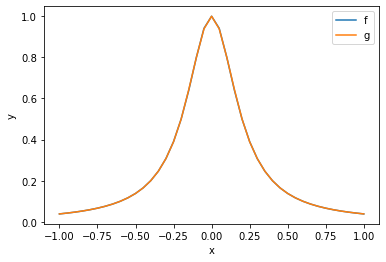

In [11]:
import matplotlib.pyplot as plt

plt.plot(xshowlist, fshowlist, label='f')
plt.plot(xshowlist, gshowlist, label='g')

plt.legend()

plt.xlabel('x')
plt.ylabel('y')
plt.show()

导出数据

In [12]:
# import pandas as pd
# df = pd.DataFrame({'Column1': xshowlist, 'Column2': fshowlist, 'Column3': gshowlist, 'Column4': fshowlist-gshowlist})

# df.to_excel('output2.xlsx', index=False)